In [1]:
import pandas as pd
from torch.utils.data import random_split, DataLoader
import matplotlib.pyplot as plt

from SoundDataSet import CovidCoughAudio

In [2]:
METADATA_FILE = 'data/metadata_compiled.csv'
DATA_PATH = 'data/'

In [3]:
metadata_df = pd.read_csv(METADATA_FILE)
filtered_metadata_df =  metadata_df[metadata_df['status'].isna() == False]
filtered_metadata_df.head()

,uuid,datetime,cough_detected,SNR,latitude,longitude,age,gender,respiratory_condition,fever_muscle_pain,...,quality_4,cough_type_4,dyspnea_4,wheezing_4,stridor_4,choking_4,congestion_4,nothing_4,diagnosis_4,severity_4
1,00039425-7f3a-42aa-ac13-834aaa2b6b92,2020-04-13T21:30:59.801831+00:00,0.9609,16.151433,31.3,34.8,15.0,male,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0007c6f1-5441-40e6-9aaf-a761d8f2da3b,2020-10-18T15:38:38.205870+00:00,0.1643,16.217201,NaN,NaN,46.0,female,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0009eb28-d8be-4dc1-92bb-907e53bc5c7a,2020-04-12T04:02:18.159383+00:00,0.9301,20.146058,40.0,-75.1,34.0,male,True,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,001328dc-ea5d-4847-9ccf-c5aa2a3f2d0f,2020-04-13T22:23:06.997578+00:00,0.9968,13.146502,NaN,NaN,21.0,male,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,001d8e33-a4af-4edb-98ba-b03f891d9a6c,2020-05-13T01:27:42.552773+00:00,0.0306,12.713480,13.8,-89.6,NaN,female,False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
covid_dataset = CovidCoughAudio(filtered_metadata_df, DATA_PATH)

torch.Size([1, 64, 938])


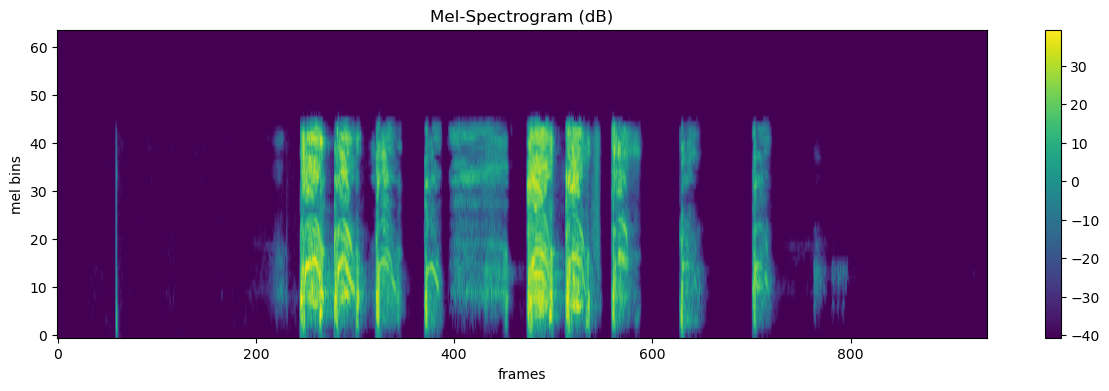

In [5]:
spec, label_id = covid_dataset[254]
print(spec.shape)

fig, axs = plt.subplots(1, 1, figsize=(15, 4))

axs.set_title('Mel-Spectrogram (dB)')
axs.set_xlabel('frames')
axs.set_ylabel('mel bins')

im = axs.imshow(spec[0], origin='lower', aspect='auto')
fig.colorbar(im, ax=axs)

plt.show(block=False)

In [6]:
BATCH_SIZE = 32

num_train = int(len(covid_dataset) * 0.8)
num_val = len(covid_dataset) - num_train

train_dataset, val_dataset = random_split(covid_dataset, [num_train, num_val])

train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=True)